C:\Users\이건우\stock-picker\data_functions.py:119: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]).mean()


Old data will be used for grid search, please make a new grid search directory if you would like to doa grid search with new data.


  0%|                                                                                                                                                                                     | 0/5 [00:00<?, ?it/s]C:\Users\이건우\stock-picker\data_loader.py:90: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  mu_s = pd.read_csv(self.mu_path(), index_col=0, squeeze=True)
C:\Users\이건우\stock-picker\data_loader.py:87: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  mu_s = pd.read_csv(self.mu_path(testing=True), index_col=0, squeeze=True)


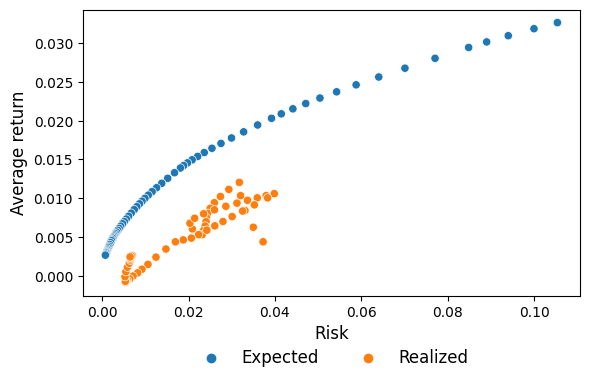

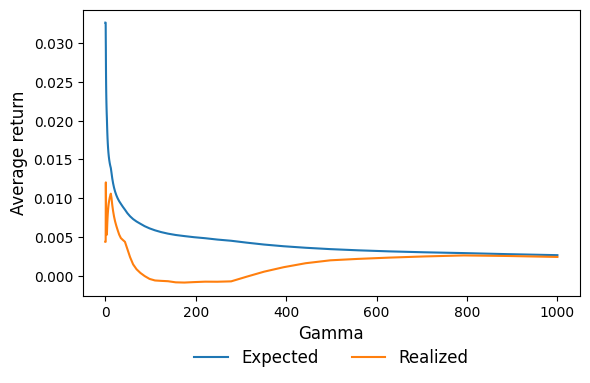

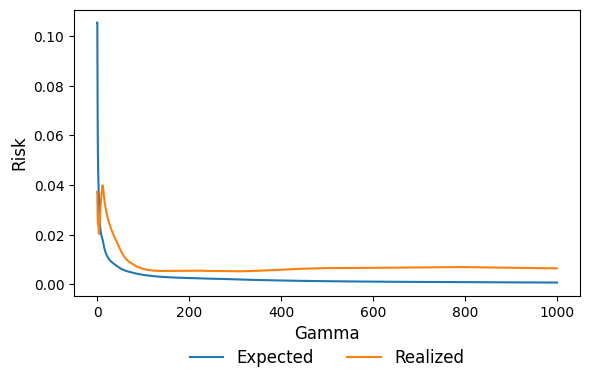

 20%|██████████████████████████████████▌                                                                                                                                          | 1/5 [00:01<00:06,  1.53s/it]C:\Users\이건우\stock-picker\data_loader.py:90: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  mu_s = pd.read_csv(self.mu_path(), index_col=0, squeeze=True)
C:\Users\이건우\stock-picker\data_loader.py:87: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  mu_s = pd.read_csv(self.mu_path(testing=True), index_col=0, squeeze=True)


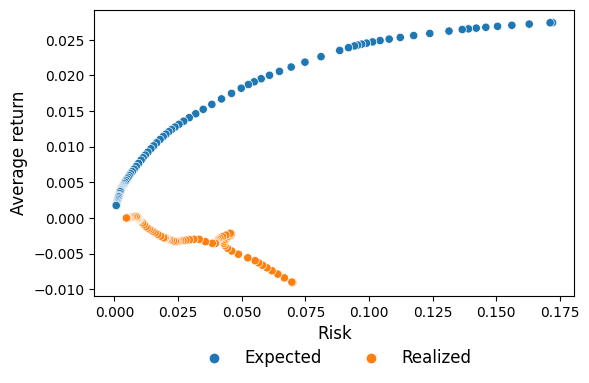

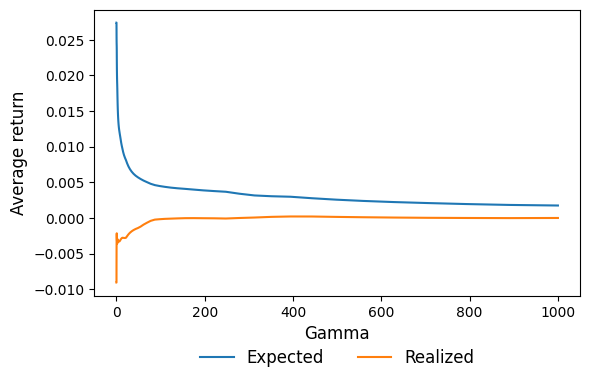

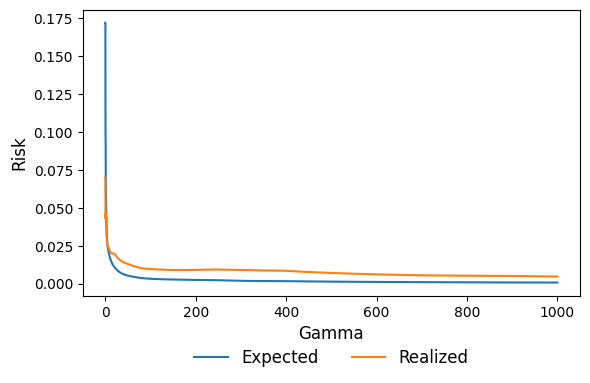

 40%|█████████████████████████████████████████████████████████████████████▏                                                                                                       | 2/5 [00:03<00:04,  1.51s/it]C:\Users\이건우\stock-picker\data_loader.py:90: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  mu_s = pd.read_csv(self.mu_path(), index_col=0, squeeze=True)
C:\Users\이건우\stock-picker\data_loader.py:87: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  mu_s = pd.read_csv(self.mu_path(testing=True), index_col=0, squeeze=True)


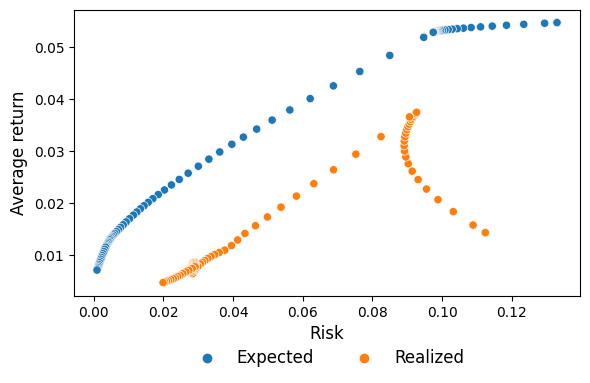

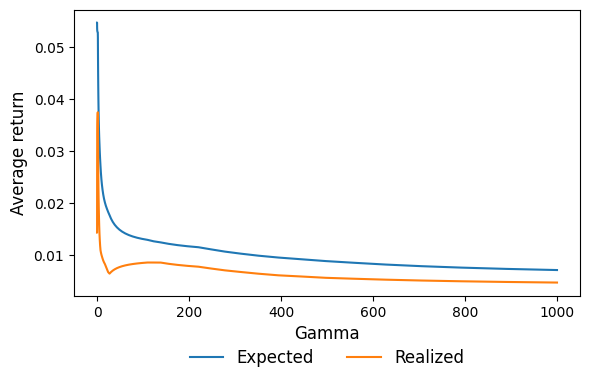

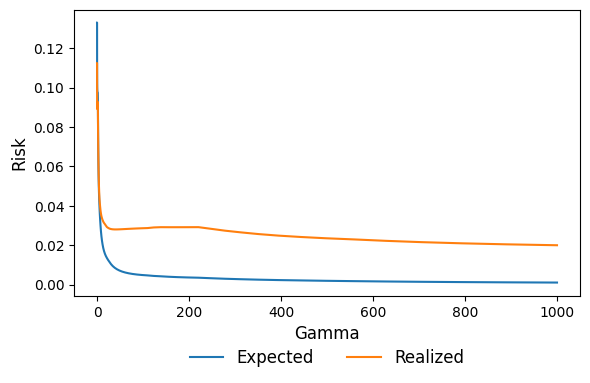

 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 3/5 [00:04<00:02,  1.45s/it]C:\Users\이건우\stock-picker\data_loader.py:90: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  mu_s = pd.read_csv(self.mu_path(), index_col=0, squeeze=True)
C:\Users\이건우\stock-picker\data_loader.py:87: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  mu_s = pd.read_csv(self.mu_path(testing=True), index_col=0, squeeze=True)


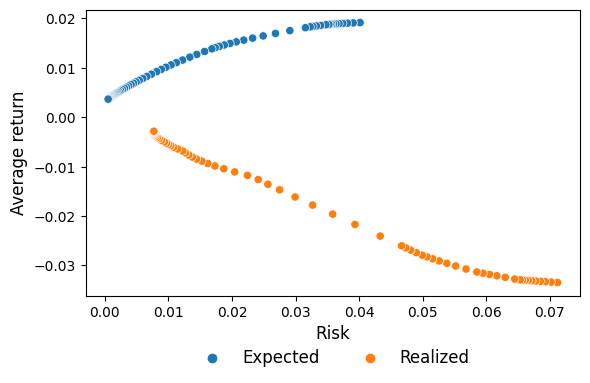

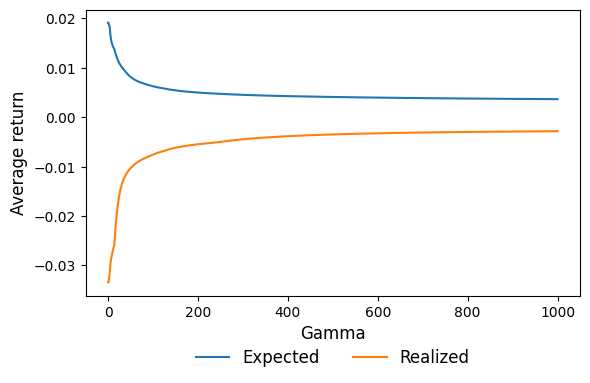

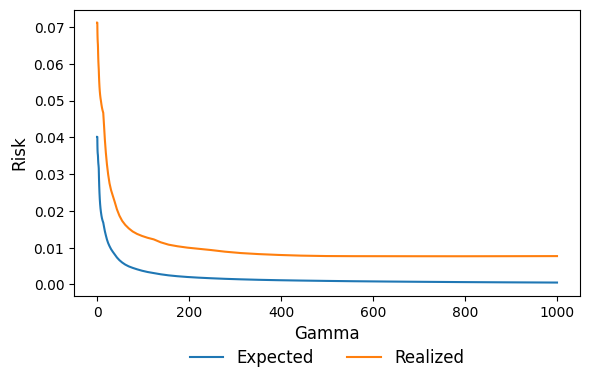

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 4/5 [00:05<00:01,  1.45s/it]C:\Users\이건우\stock-picker\data_loader.py:90: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  mu_s = pd.read_csv(self.mu_path(), index_col=0, squeeze=True)
C:\Users\이건우\stock-picker\data_loader.py:87: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  mu_s = pd.read_csv(self.mu_path(testing=True), index_col=0, squeeze=True)


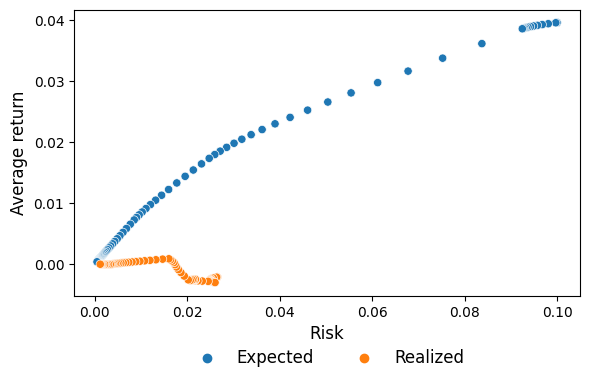

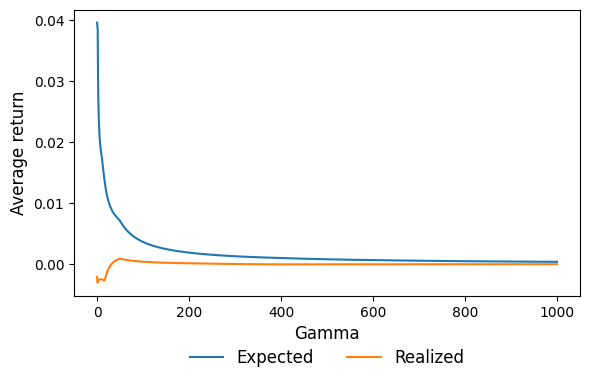

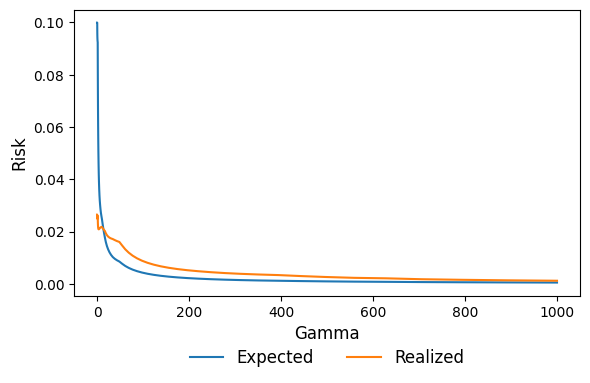

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:07<00:00,  1.44s/it]


In [2]:
import os

from tqdm import tqdm

from data_functions import DataGenerator, generate_data_for_grid_search
from data_loader import DataLoader
from optimizer import PortfolioOptimizer
from plotting import plot_performance

if __name__ == '__main__':

    # Define range of dates over which to generate data
    start_date = (2020, 1, 1)  # (YYYY, MM, DD)
    end_date = (2023, 1, 1)  # (YYYY, MM, DD)
    do_grid_search = True  # whether or not a grid search will be done for data selection
    # Choose where plots will be saved
    plots_directory = 'plots'  # path for plots directory
    os.makedirs(plots_directory, exist_ok=True)  # make directory for plots

    # Initialize the data loader, which loads the expected return and covariance matrices
    data_loader = DataLoader(data_directory='data')
    data_generator = DataGenerator(start_date=(2020, 1, 1),  # (YYYY, M, D)
                                   end_date=(2023, 1, 1),  # (YYYY, M, D)
                                   data_loader=data_loader)  # The data loader object that manages data

    # Do a grid search to find parameters that best suit your use case
    if do_grid_search:
        generate_data_for_grid_search(start_date, end_date)
        data_generator.choose_params(new_grid_search=False, use_grid_search_params=True)
    else:
        print('default parameters will be used to generate data.')

    # Generate new data (should comment out this line once you have enough data)
    # data_generator.generate_new_data(number_of_new_data=5)

    # Commented out while we look into data generation, but everything below here works
    for d_num in tqdm(data_loader.data_numbers):  # Iterate through all saved data
        # Load optimizing and testing data
        mu_s, sigma_df = data_loader.get_data(d_num)
        mu_test_s, sigma_test_df = data_loader.get_data(d_num, load_testing=True)
        # Build model with optimizing data
        model = PortfolioOptimizer(mu_s, sigma_df)
        # Iterate through the set of gamma values (i.e., risk levels)
        for gamma in model.gamma_values:
            model.solve_model(gamma)  # Solve model with given gamma
            model.calculate_return_and_risk()  # Save the expected return and risk
            model.calculate_return_and_risk(mu_test_s, sigma_test_df)  # Save the realized return and risk on test data
        # Plot performance of portfolio
        plot_performance(model, d_num, plots_directory)